In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [87]:
file_path = os.path.join('D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\Chapter 2 - housing.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_18208\3999438826.py:1: SyntaxWarning: invalid escape sequence '\C'
  file_path = os.path.join('D:\Code for tutorials\Machine Learning\datasets\supervised Learnings\classification\KNN\Chapter 2 - housing.csv')


In [88]:

housing_data = pd.read_csv(file_path)
# print(f"houseing_data.head():\n{housing_data.head()}")
print(f"housing_data.info():\n{housing_data.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
housing_data.info():
None


<Axes: ylabel='ocean_proximity'>

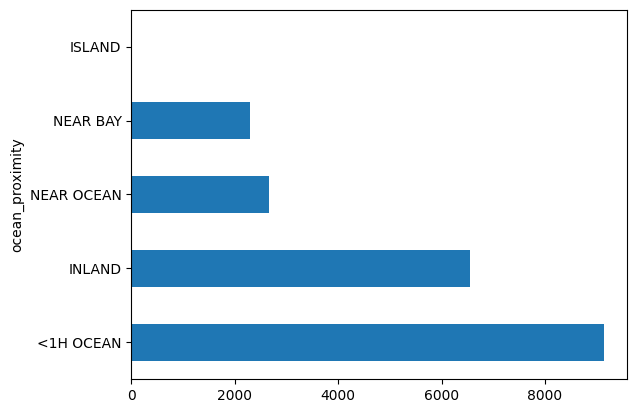

In [89]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')

In [90]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

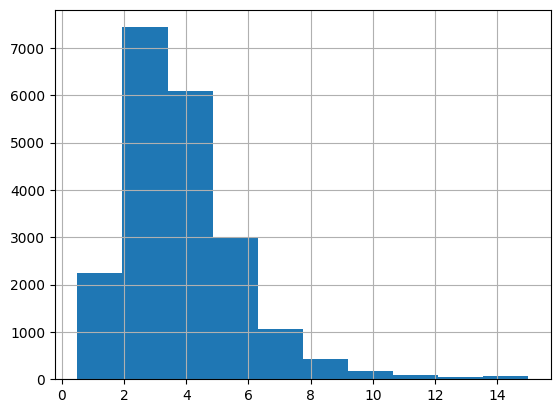

In [91]:
housing_data['median_income'].hist()

In [92]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

housing_data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

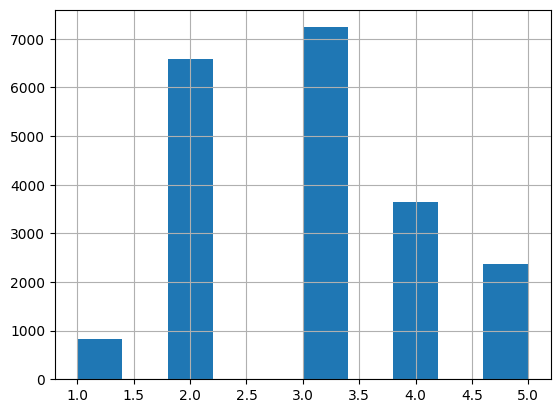

In [93]:
housing_data['income_cat'].hist()

In [94]:
y=housing_data['median_house_value']
X=housing_data.drop('median_house_value',axis=1)



### Split Dataset

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")


X_train: (16512, 10)
X_test: (4128, 10)


<Axes: >

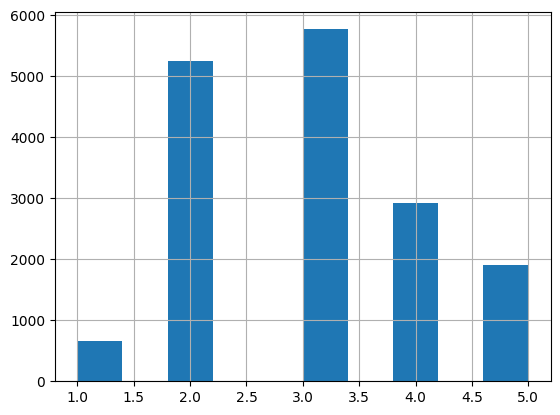

In [96]:
X_train['income_cat'].hist()

### Stratisfied Split

In [97]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    
print(strat_train_set.shape) 
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [98]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [99]:
housing_data['income_cat'].value_counts()/len(housing_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [100]:
housing_data['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [101]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_train_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [102]:
# print(strat_train_set)
strat_train_set.drop("income_cat", axis="columns", inplace=True)
# print(strat_train_set)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

### Visualizing the data

In [ ]:
import matplotlib.pyplot as plt